**Traffic Count Analysis by Jeremy Luu**

In [4]:
# load pandas
import pandas as pd
import numpy as np

# load data
traffic_count_df = pd.read_csv("Traffic_Count.csv", index_col="id") # use the column named _id as the row index

In [5]:
#print out data
traffic_count_df.head(10)

,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
id,,,,,,,,,,,,,,,,,,,,,
1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15
1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
1047444948,17,1.366891e+09,2018-10-18,NaN,NaN,NaN,NaN,NaN,25.0,NaN,...,-79.942273,40.446282,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26
1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1073440033,156,1.736165e+09,2017-07-28,NaN,NaN,NaN,NaN,Intersection Study,NaN,NaN,...,-79.960385,40.438983,Central Oakland,3.0,4.0,42003040500,3.0,4.0,4.0,2-14


In [6]:
#new dataframe with only the car traffic vs the neighborhood
neighborhoodToCarTraffic_df = traffic_count_df[['neighborhood','average_daily_car_traffic']].copy()

neighborhoodToCarTraffic_df.head(10)

,neighborhood,average_daily_car_traffic
id,,
1011743669,Polish Hill,4949.0
1026101993,Central Lawrenceville,NaN
1032382575,Windgap,NaN
103627606,Squirrel Hill South,2741.0
1039546167,Perry North,NaN
1041392556,Central Northside,1046.0
1047444948,Squirrel Hill North,NaN
1053645660,Polish Hill,3015.0
1073440033,Central Oakland,NaN


In [7]:
#organize the new dataframe by alphabetical order in neighborhoods
neighborhoodToCarTraffic_df = neighborhoodToCarTraffic_df.sort_values('neighborhood')

neighborhoodToCarTraffic_df.head(10)

,neighborhood,average_daily_car_traffic
id,,
462461649,Allegheny Center,2386.0
2137013195,Allegheny West,477.0
1071105336,Arlington,NaN
1471518402,Arlington,2224.0
1425434092,Arlington,2347.0
929455212,Banksville,NaN
2144656649,Beechview,NaN
1670424503,Beechview,2046.0
1908186545,Beechview,1446.0


In [22]:
#Add up average daily car traffic for each neighborhood
import math


newDict = {}

for index,row in neighborhoodToCarTraffic_df.iterrows():
    if(newDict.get(row["neighborhood"]) == None):
        if(not math.isnan(row["average_daily_car_traffic"])):
            newDict[row["neighborhood"]] = row["average_daily_car_traffic"]
        else:
            newDict[row["neighborhood"]] = 0
    else:
        if(not math.isnan(row["average_daily_car_traffic"])):
            tempQuant = newDict.get(row["neighborhood"])
            tempQuant += row["average_daily_car_traffic"]
            newDict[row["neighborhood"]] = tempQuant

for elements in newDict:
    print(elements, newDict[elements])

Allegheny Center 2386.0
Allegheny West 477.0
Arlington 4571.0
Banksville 0
Beechview 4255.0
Beltzhoover 1577.0
Bloomfield 43101.0
Bluff 5365.0
Brighton Heights 7547.0
Brookline 39144.0
California-Kirkbride 14926.0
Carrick 13787.0
Central Business District 2305.0
Central Lawrenceville 13499.0
Central Northside 5945.0
Central Oakland 11306.0
Chartiers City 2571.0
Chateau 0
Crafton Heights 11500.0
Crawford-Roberts 0
Duquesne Heights 5831.0
East Allegheny 1924.0
East Hills 16253.0
East Liberty 51247.0
Elliott 4028.0
Fineview 419.0
Friendship 4887.0
Greenfield 7158.0
Hazelwood 2579.0
Highland Park 23471.0
Homewood North 7027.0
Homewood South 42742.0
Knoxville 7646.0
Larimer 37713.0
Lincoln Place 126.0
Lincoln-Lemington-Belmar 195.0
Lower Lawrenceville 3472.0
Manchester 21293.0
Marshall-Shadeland 15520.0
Middle Hill 0
Morningside 14345.0
Mount Washington 47336.0
New Homestead 666.0
North Oakland 23821.0
North Shore 10350.0
Oakwood 0
Overbrook 777.0
Perry North 19114.0
Perry South 12075.0
Poi

In [27]:
#convert dictionary of neighborhoods to a dataframe
neighborhoodToTraffic = pd.DataFrame(list(newDict.items()), columns = ['neighborhood', 'total traffic'])
#accessing the last row
last_row = len(neighborhoodToTraffic)

#deleting the last row
neighborhoodToTraffic = neighborhoodToTraffic.drop(neighborhoodToTraffic.index[last_row-1])

#displaying the dataframe
neighborhoodToTraffic.head(len(neighborhoodToTraffic))

,neighborhood,total traffic
0,Allegheny Center,2386.0
1,Allegheny West,477.0
2,Arlington,4571.0
3,Banksville,0.0
4,Beechview,4255.0
...,...,...
69,Upper Hill,2860.0
70,Upper Lawrenceville,0.0
71,West Oakland,2585.0
72,Westwood,15400.0


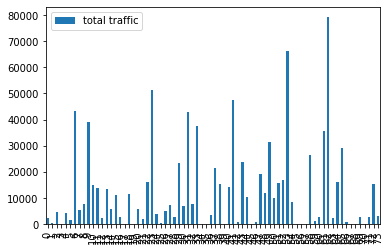

In [32]:
#plotting the final data
neighborhoodToTraffic.plot.bar()

In [35]:
#final verdict
leastValue = 99999999999
neighborhood = ""
for index,row in neighborhoodToTraffic.iterrows():
    if(row["total traffic"] != 0 and leastValue > row["total traffic"]):
        leastValue = row["total traffic"]
        neighborhood = row["neighborhood"]

print(neighborhood, "is the best neighborhood with the least amount of traffic with", leastValue, "traffic")

South Side Flats is the best neighborhood with the least amount of traffic with 115.0 traffic
